In [ ]:
!pip uninstall -y transformers torch torchvision
!pip install torch torchvision --upgrade
!pip install transformers==4.40.1
!pip install google-api-python-client langdetect

Found existing installation: transformers 4.52.4
Uninstalling transformers-4.52.4:
  Successfully uninstalled transformers-4.52.4
Found existing installation: torch 2.7.1
Uninstalling torch-2.7.1:
  Successfully uninstalled torch-2.7.1
Found existing installation: torchvision 0.22.1
Uninstalling torchvision-0.22.1:
  Successfully uninstalled torchvision-0.22.1
  Using cached torch-2.7.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (29 kB)
  Using cached torchvision-0.22.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
Using cached torch-2.7.1-cp311-cp311-manylinux_2_28_x86_64.whl (821.2 MB)
Using cached torchvision-0.22.1-cp311-cp311-manylinux_2_28_x86_64.whl (7.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
peft 0.15.2 requires transformers, which is not installed.
sentence-transformers 4.1.0 requires transformers<5.0.0,>=4.41.0, which is not

#Potentially Useful Methods - Youtube API
| **Method**                 | **Returns**                                                          | **Use Case**                                                                    |
| -------------------------- | -------------------------------------------------------------------- | ------------------------------------------------------------------------------- |
| `search().list()`          | Metadata for videos, channels, or playlists matching a query         | - Keyword search<br>- Find trending or recent videos<br>- Filter by region/date |
| `videos().list()`          | Details for one or more videos: title, views, likes, duration, etc.  | - Video analytics<br>- Engagement tracking<br>- Content enrichment              |
| `commentThreads().list()`  | Top-level comments on a video (text, likes, publish time, author)    | - Sentiment analysis<br>- User feedback mining<br>- Comment scraping            |
| `channels().list()`        | Channel info: subscriber count, total views, uploads playlist, etc.  | - Creator insights<br>- Competitor analysis<br>- Channel tracking               |
| `playlistItems().list()`   | All videos in a given playlist (e.g., uploads, curated lists)        | - Get full video lists<br>- Scrape all uploads<br>- Analyze playlists           |
| `videoCategories().list()` | List of video categories (e.g., Music, Education) by region          | - Category tagging<br>- Data labeling<br>- Content classification               |
| `videos().getRating()`     | Authenticated user's rating of a video (like/dislike/none)           | - Personalized apps (requires OAuth)<br>- User engagement tracking              |
| `activities().list()`      | A channel’s activity feed: uploads, likes, comments (OAuth required) | - Track user/channel behavior<br>- Social graph exploration                     |

## Widget #1: Top 5 videos for a keyword based on view count

In [ ]:
from googleapiclient.discovery import build

# Define the search keyword (lowercased for exact matching)
keyword = "oat milk".lower()

# Initialize YouTube API
api_key = 'API-KEY'
youtube = build('youtube', 'v3', developerKey=api_key)

# Step 1: Search for videos
search_response = youtube.search().list(
    q=f'"{keyword}"',  # Quoted for better relevance
    part='snippet',
    type='video',
    order='viewCount',
    maxResults=25,
    safeSearch='strict'
).execute()

# Step 2: Filter for exact phrase match
filtered_items = []
for item in search_response['items']:
    title = item['snippet']['title'].lower()
    description = item['snippet'].get('description', '').lower()
    if keyword in title or keyword in description:
        filtered_items.append(item)

# Step 3: Extract video IDs
video_ids = [item['id']['videoId'] for item in filtered_items]

# Step 4: Fetch statistics
if video_ids:
    video_response = youtube.videos().list(
        part='snippet,statistics',
        id=','.join(video_ids)
    ).execute()

    videos = []
    for item in video_response['items']:
        title = item['snippet']['title']
        views = int(item['statistics'].get('viewCount', 0))
        videos.append((title, views))

    # Sort and display
    top_videos = sorted(videos, key=lambda x: x[1], reverse=True)[:5]
    print(f"\nTop 5 most viewed videos for keyword: '{keyword}'\n")
    for title, views in top_videos:
        print(f"{title} — {views:,} views")
else:
    print(f"No videos found with exact phrase '{keyword}'.")



Top 5 most viewed videos for keyword: 'oat milk'

Iced Caramel Oat Milk Latte! 📸💫 — 7,946,934 views
LUV Oat Milk - Luv นมโอ๊ต รักอร่อย ต้องลัฟโอ๊ต — 4,621,314 views
Which is better? Almond Milk, Whole Milk or Oat Milk? 🥛 — 4,420,742 views
That lactose-intolerant friend who won’t pay extra for oat milk 🤦‍♂️ — 4,291,802 views
Oat milk — 2,654,154 views


## Widget #2: Sentiment breakdown based on top-ranked recent videos with keyword
Notes: Because of API call limits, the results are based off of up to 25 top videos related to the keyword (not comprehensive of all videos with keyword)

In [ ]:
from transformers import AutoModelForSequenceClassification

model_name = "cardiffnlp/twitter-roberta-base-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
print("Model loaded successfully!")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possibl

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Model loaded successfully!


Found 25 relevant English video titles.



/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Sentiment Analysis of Recent English YouTube Titles:
Negative: 4
Neutral: 17
Positive: 4


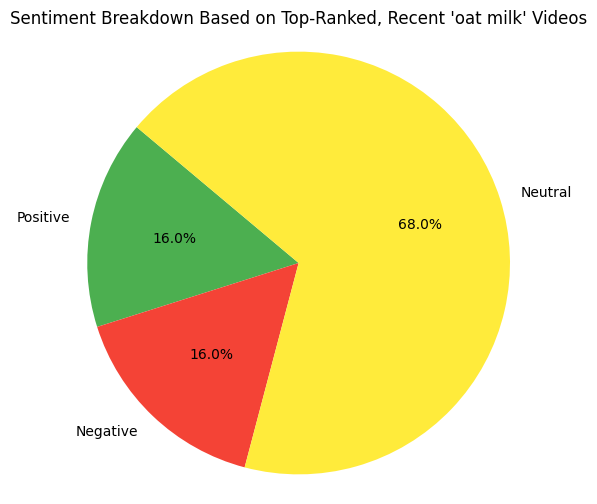

In [ ]:
from googleapiclient.discovery import build
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np
import matplotlib.pyplot as plt
from langdetect import detect, DetectorFactory

# Fix seed for consistent language detection results
DetectorFactory.seed = 0

# Set your YouTube API key and keyword
api_key = 'API-KEY'
keyword = "oat milk".lower()

# Set up YouTube API client
youtube = build('youtube', 'v3', developerKey=api_key)

# Step 1: Fetch up to 25 valid English titles with the exact keyword
titles = []
next_page_token = None

while len(titles) < 25:
    search_response = youtube.search().list(
        q=f'"{keyword}"',
        part='snippet',
        type='video',
        order='date',
        maxResults=50,  # Max per request
        safeSearch='strict',
        pageToken=next_page_token
    ).execute()

    for item in search_response['items']:
        title = item['snippet']['title']
        if keyword in title.lower():
            try:
                if detect(title) == 'en' and title not in titles:
                    titles.append(title)
                if len(titles) >= 25:
                    break
            except:
                continue

    next_page_token = search_response.get('nextPageToken')
    if not next_page_token:
        break

print(f"Found {len(titles)} relevant English video titles.\n")

# Step 2: Load Cardiff NLP sentiment model
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Step 3: Sentiment classification
labels = ["Negative", "Neutral", "Positive"]
sentiment_counts = {label: 0 for label in labels}

def classify_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True)
    outputs = model(**inputs)
    scores = outputs.logits.detach().numpy()[0]
    probs = np.exp(scores) / np.sum(np.exp(scores))  # softmax
    return labels[np.argmax(probs)], float(np.max(probs))

for title in titles:
    label, score = classify_sentiment(title)
    sentiment_counts[label] += 1

# Step 4: Print sentiment results
print("Sentiment Analysis of Recent English YouTube Titles:")
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {count}")

# Step 5: Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    [sentiment_counts["Positive"], sentiment_counts["Negative"], sentiment_counts["Neutral"]],
    labels=["Positive", "Negative", "Neutral"],
    colors=['#4caf50', '#f44336', '#ffeb3b'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title(f"Sentiment Breakdown Based on Top-Ranked, Recent '{keyword}' Videos")
plt.axis('equal')
plt.show()

## Widget #3: Top trending tags related to keyword
Notes: Because of API call limits, the results are based off of up to 25 top videos related to the keyword (not comprehensive of all videos with keyword)

Found 25 English videos with titles containing 'oat milk'.


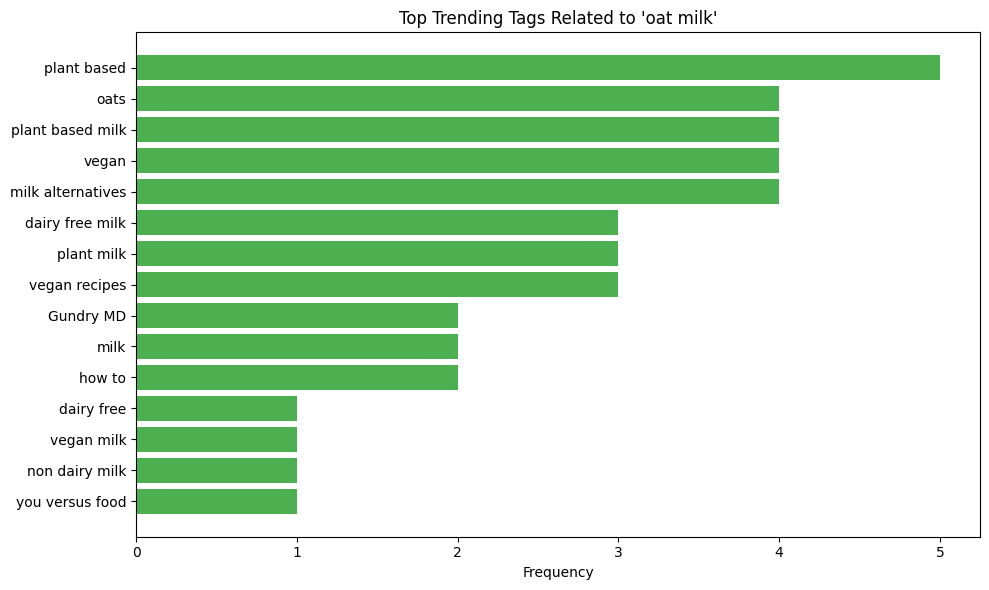

In [ ]:
from googleapiclient.discovery import build
from langdetect import detect, DetectorFactory
from collections import Counter
import matplotlib.pyplot as plt

# Fix seed for consistent language detection
DetectorFactory.seed = 0

# YouTube API setup
api_key = 'API-KEY'
youtube = build('youtube', 'v3', developerKey=api_key)

keyword = "oat milk".lower()
target_video_count = 25
video_ids = []
next_page_token = None

# Step 1: Collect up to 25 English videos with the exact keyword
while len(video_ids) < target_video_count:
    search_response = youtube.search().list(
        q=f'"{keyword}"',
        part='snippet',
        type='video',
        maxResults=50,
        safeSearch='strict',
        pageToken=next_page_token
    ).execute()

    for item in search_response['items']:
        title = item['snippet']['title']
        try:
            if detect(title) == 'en' and keyword in title.lower():
                video_id = item['id']['videoId']
                if video_id not in video_ids:
                    video_ids.append(video_id)
                if len(video_ids) >= target_video_count:
                    break
        except:
            continue

    next_page_token = search_response.get('nextPageToken')
    if not next_page_token:
        break

print(f"Found {len(video_ids)} English videos with titles containing '{keyword}'.")

if not video_ids:
    print("No videos found. Exiting.")
else:
    # Step 2: Fetch video details (tags)
    video_response = youtube.videos().list(
        part='snippet',
        id=','.join(video_ids)
    ).execute()

    all_tags = []
    for video in video_response['items']:
        tags = video['snippet'].get('tags', [])
        all_tags.extend(tags)

    # Step 3: Count tag frequencies
    tag_counts = Counter(all_tags)
    filtered_tag_counts = {
        tag: count for tag, count in tag_counts.items()
        if keyword not in tag.lower() and len(tag) > 2
    }

    # Step 4: Show top 15 trending tags
    top_tags = Counter(filtered_tag_counts).most_common(15)

    if not top_tags:
        print("No significant tags found besides the keyword.")
    else:
        tags, counts = zip(*top_tags)

        plt.figure(figsize=(10, 6))
        plt.barh(tags[::-1], counts[::-1], color='#4caf50')
        plt.xlabel('Frequency')
        plt.title(f"Top Trending Tags Related to '{keyword}'")
        plt.tight_layout()
        plt.show()